In [20]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [27]:
def create_horizontal_text_layout(image_path, descriptions, output_path):
    # 加载图像
    img = Image.open(image_path)
    img_array = np.array(img)

    # 创建绘图
    fig, ax = plt.subplots(figsize=(12, 6))  # 图像尺寸可以根据需要调整

    # 在subplot中显示图像
    ax.imshow(img_array)
    ax.axis('off')  # 关闭坐标轴

    # 准备合并文本
    text_description = "\n".join(descriptions)

    # 在图像旁边添加文本
    plt.figtext(0.5, 0.5, text_description, wrap=True, horizontalalignment='left', fontsize=12, verticalalignment='center')

    # 调整布局以防文本被剪切
    plt.subplots_adjust(left=0.05, right=0.75)

    # 保存图像
    plt.savefig(output_path, bbox_inches='tight')  # bbox_inches='tight' 用于确保所有内容都包含在内
    # plt.show()  # 显示图像以供预览

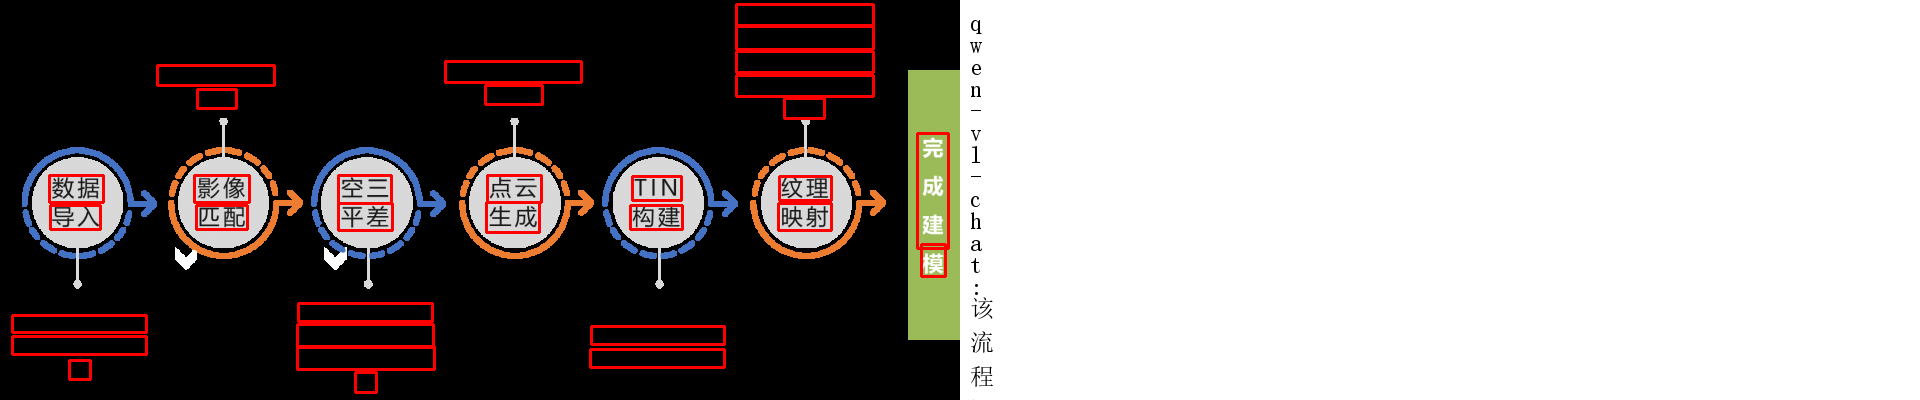

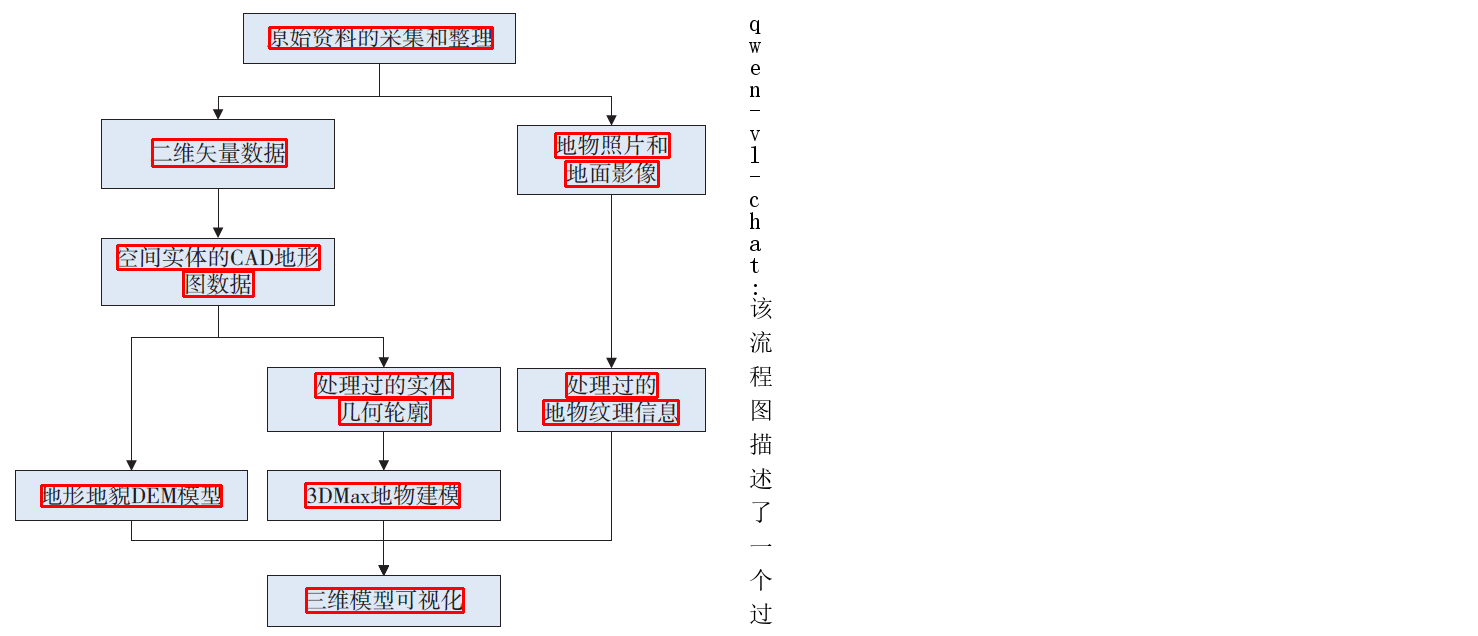

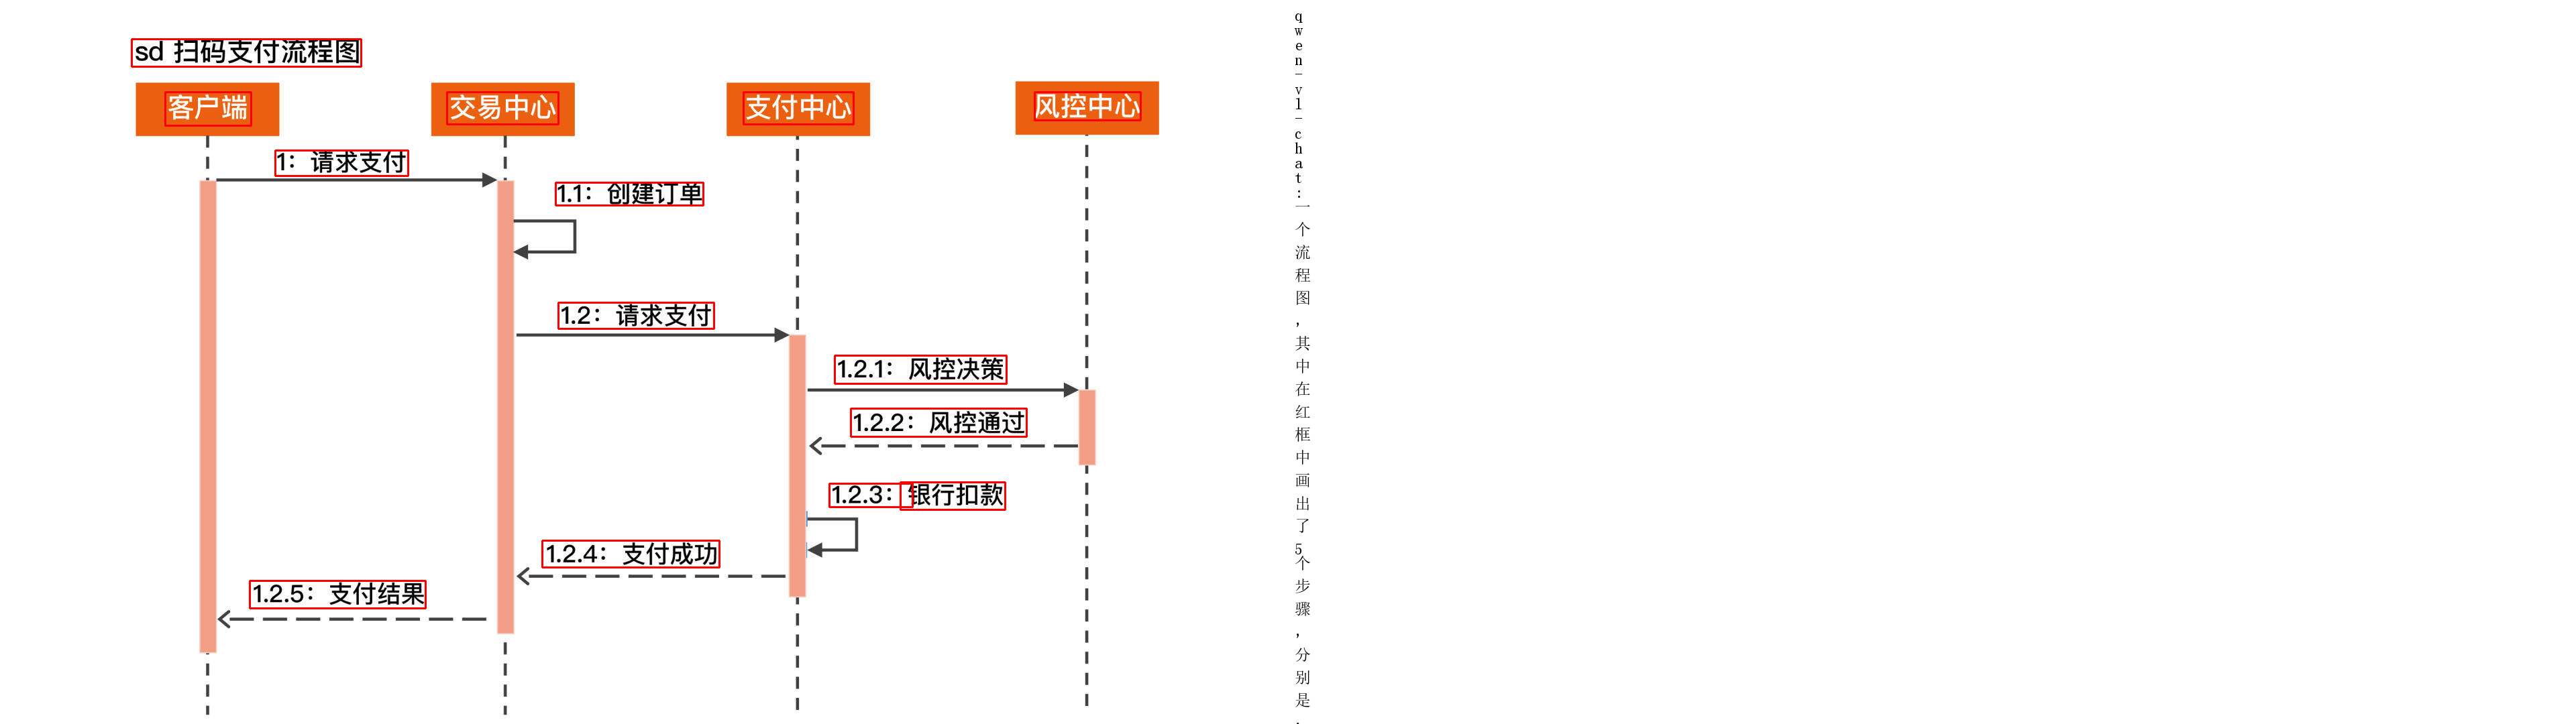

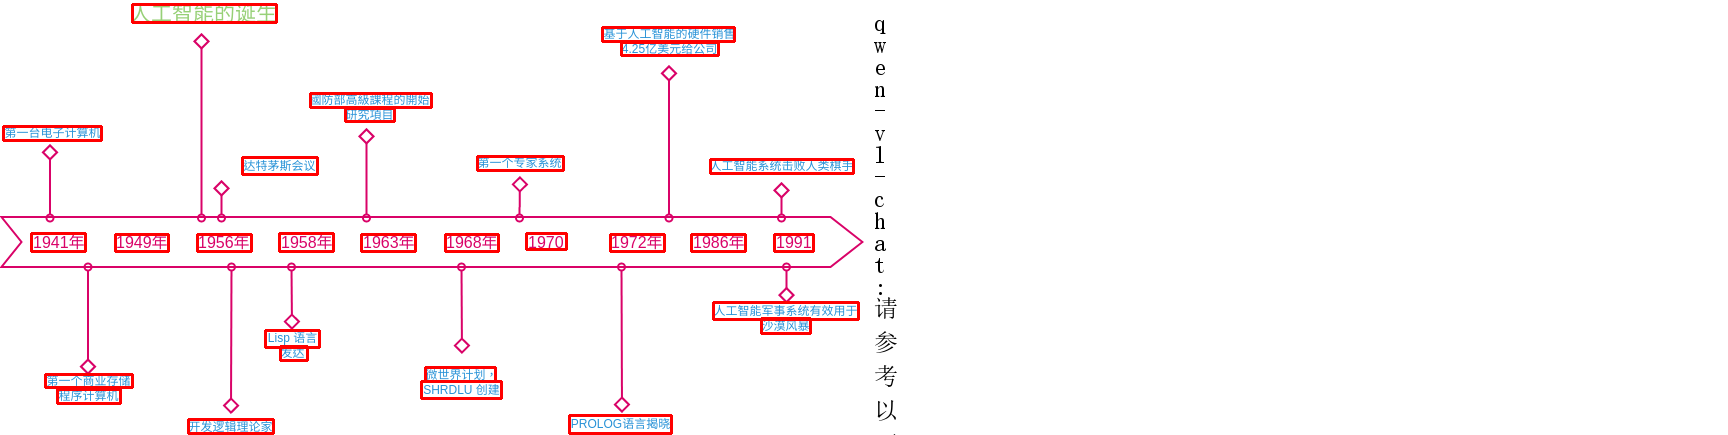

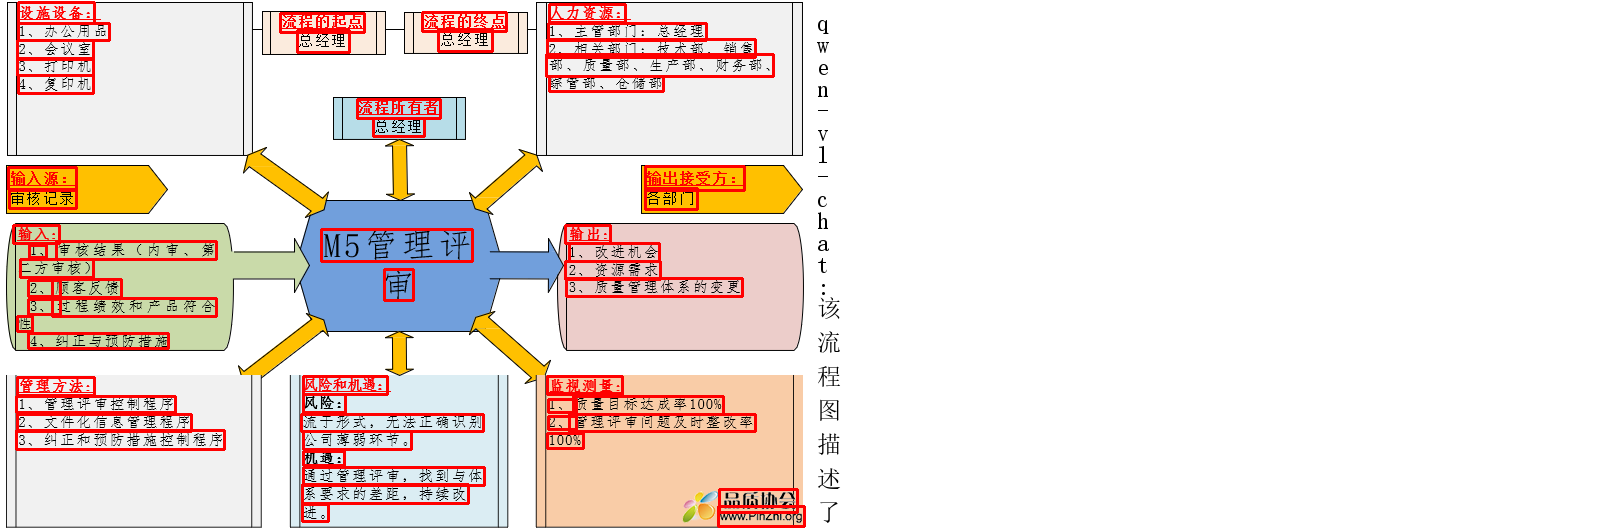

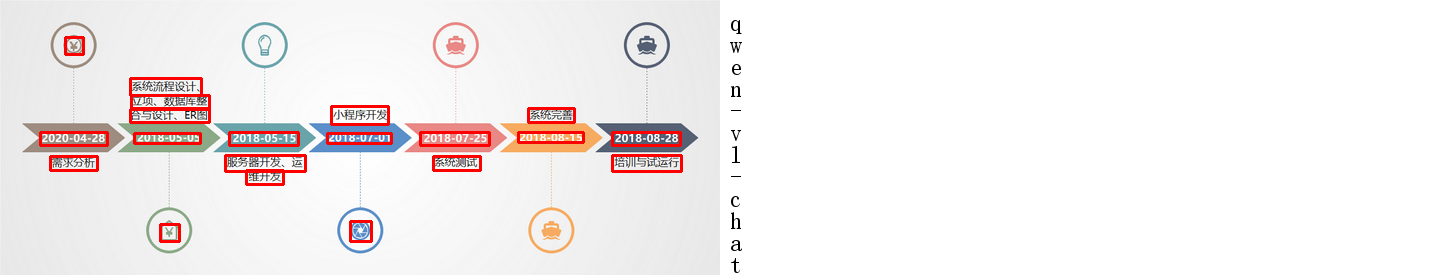

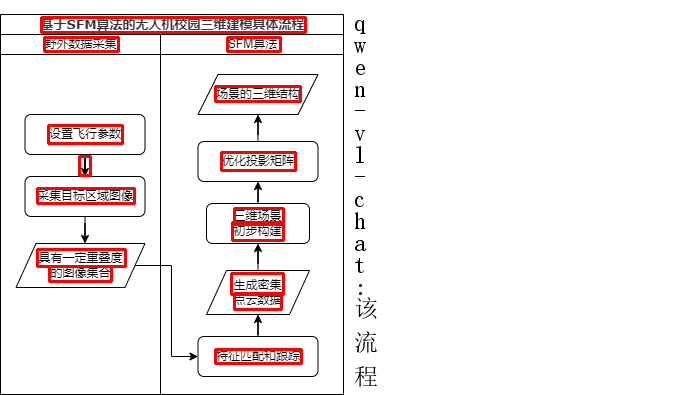

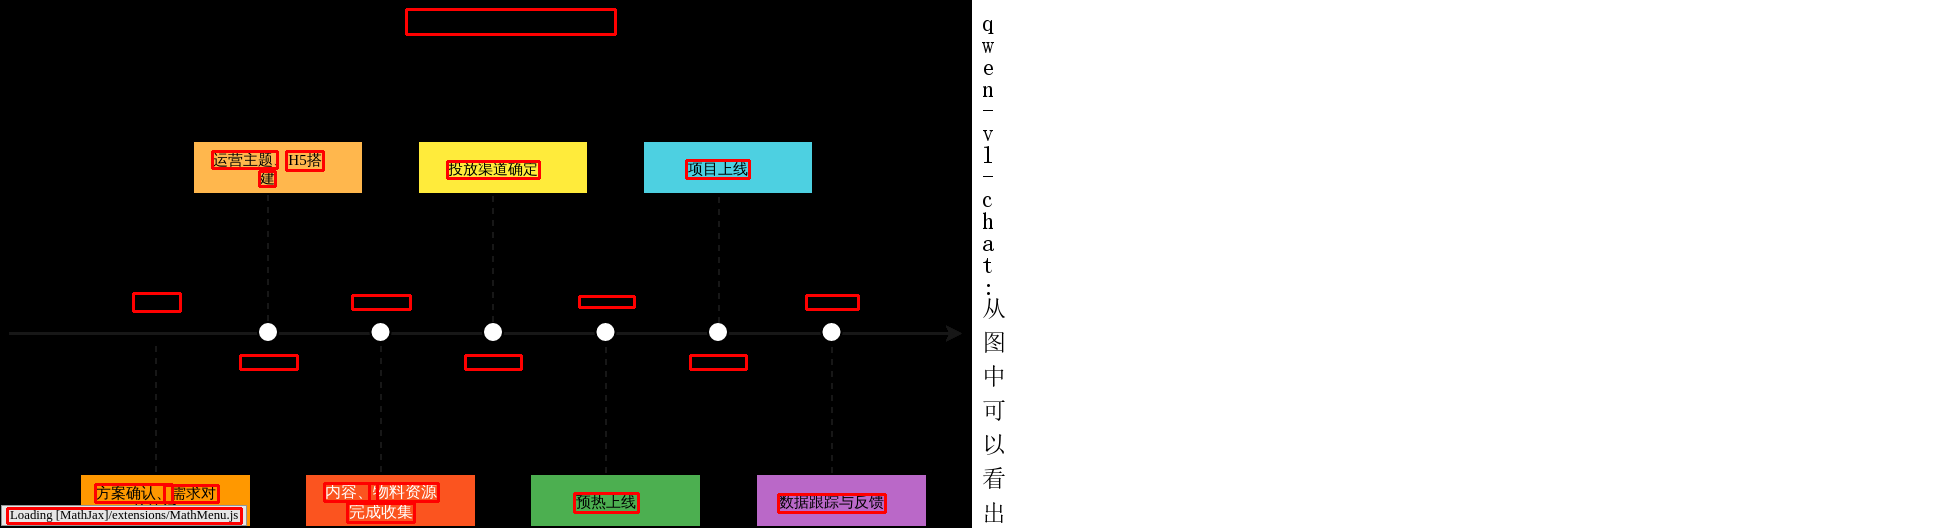

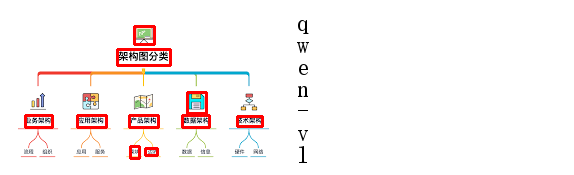

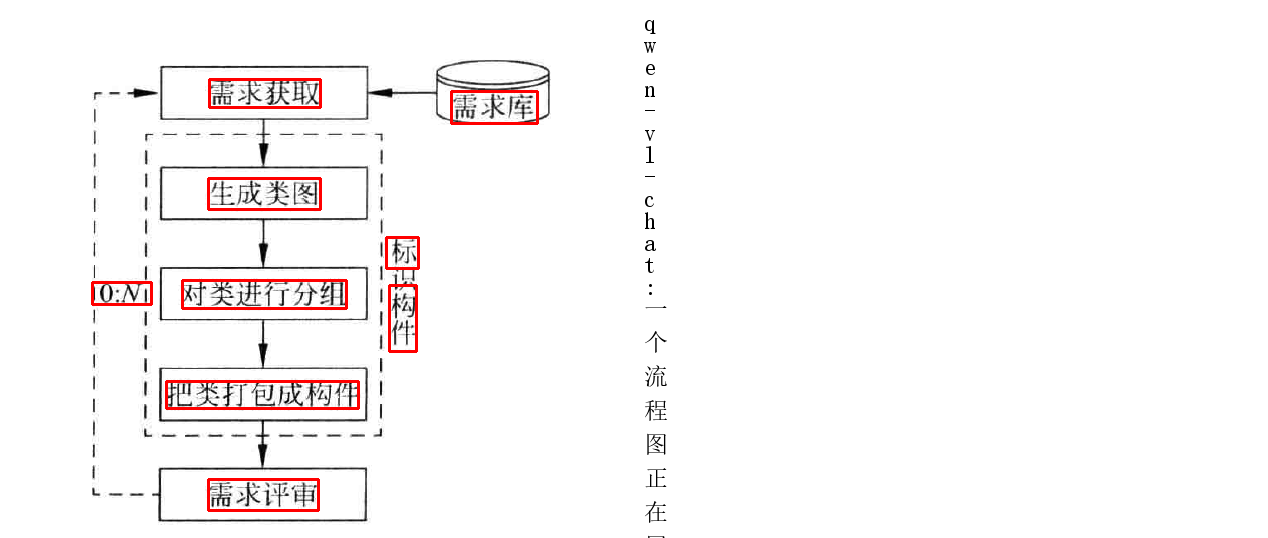

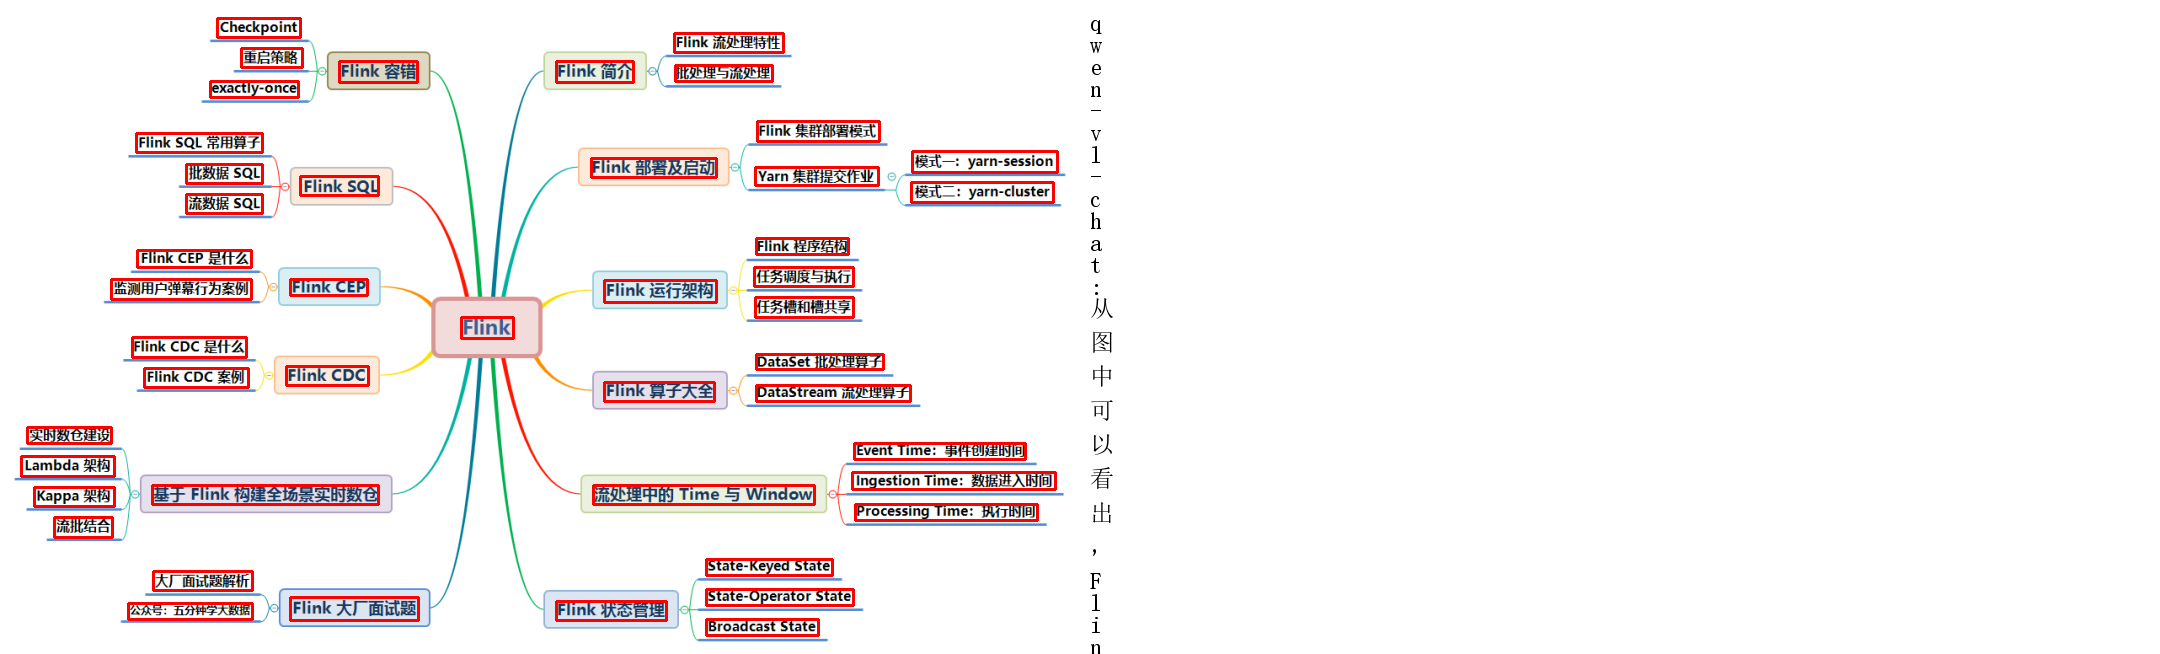

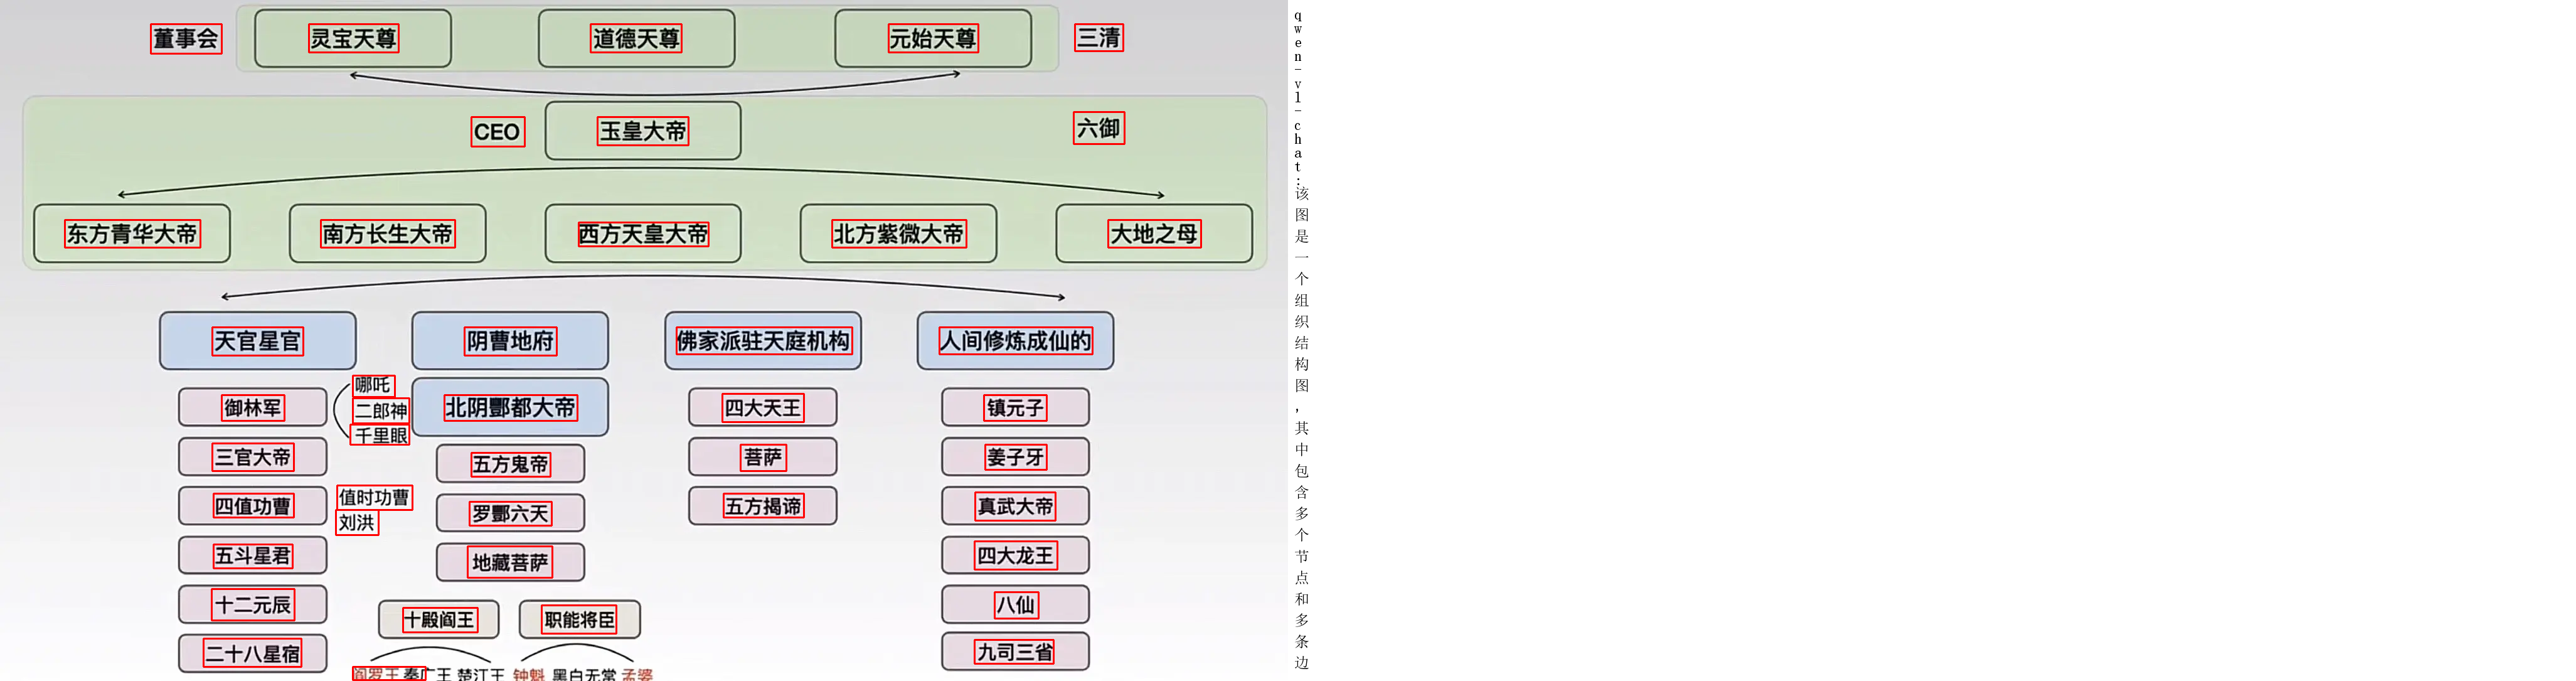

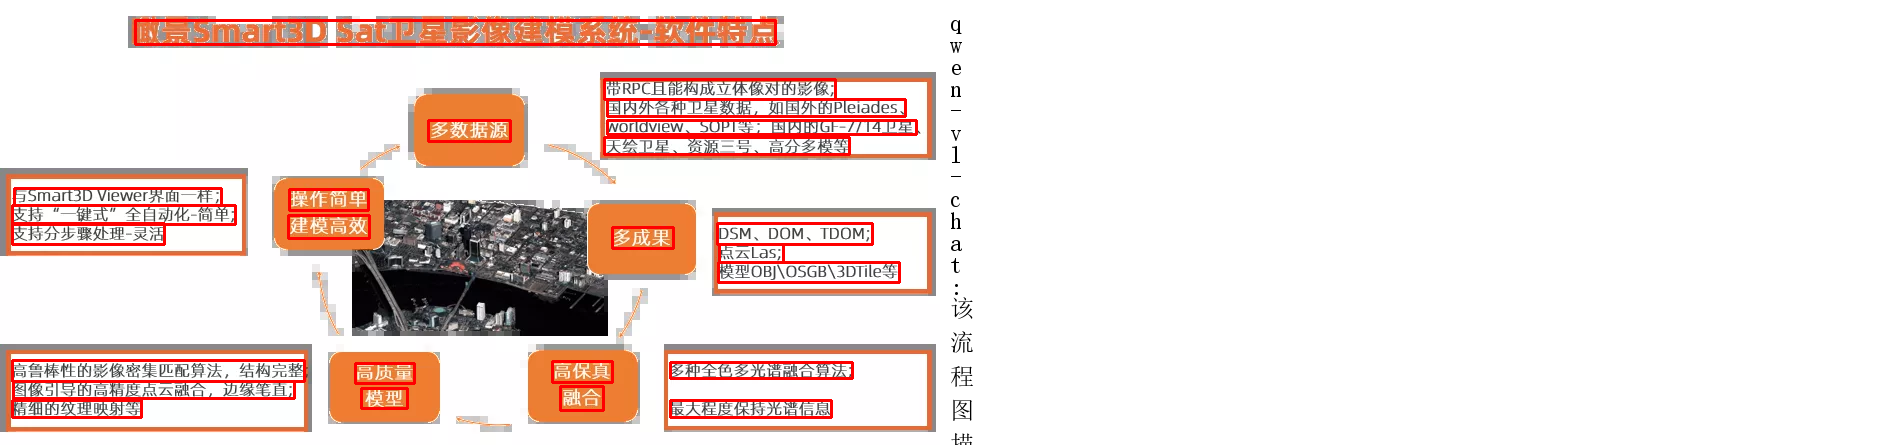

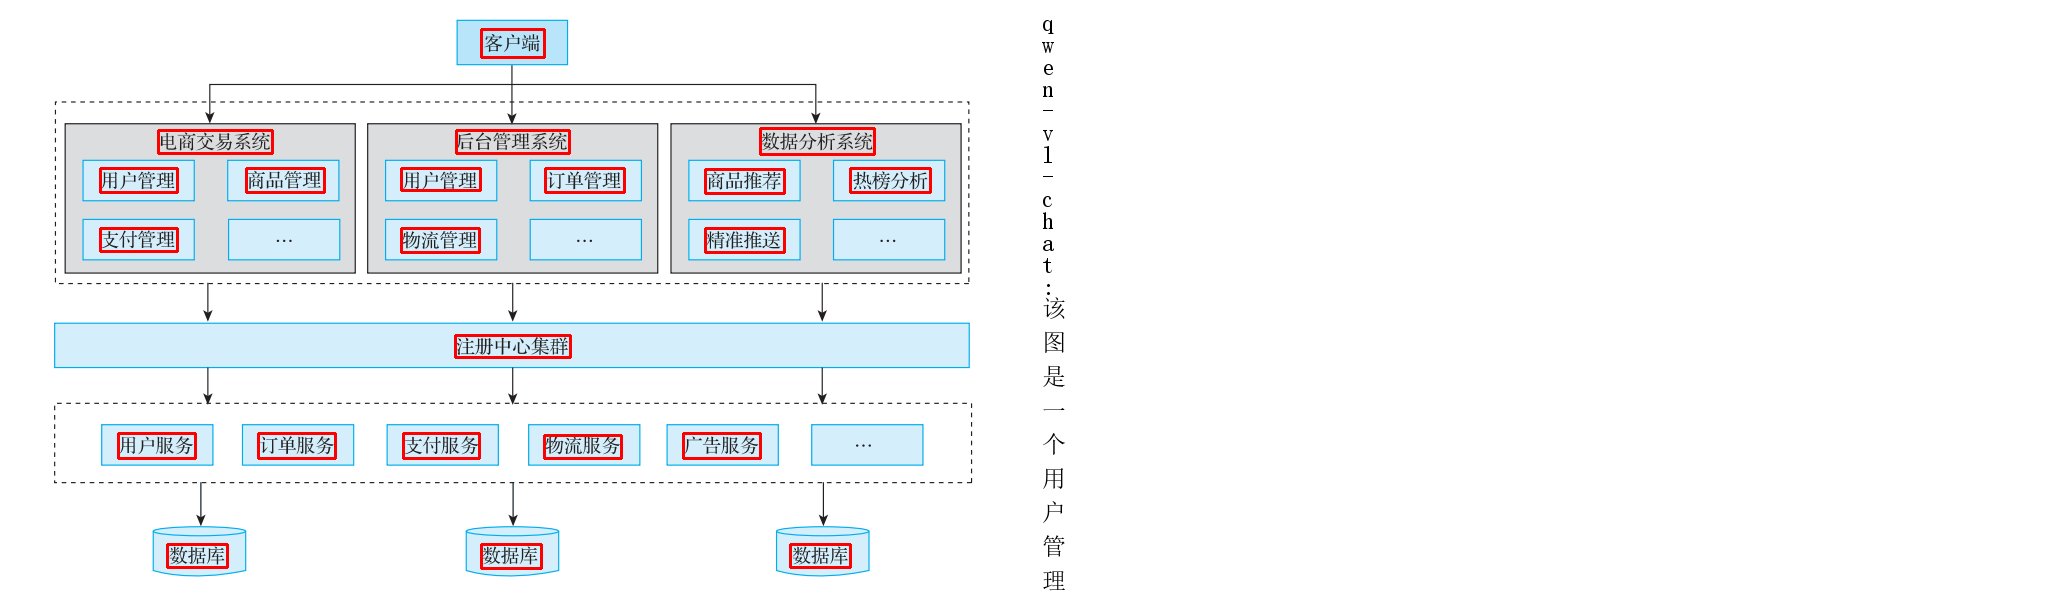

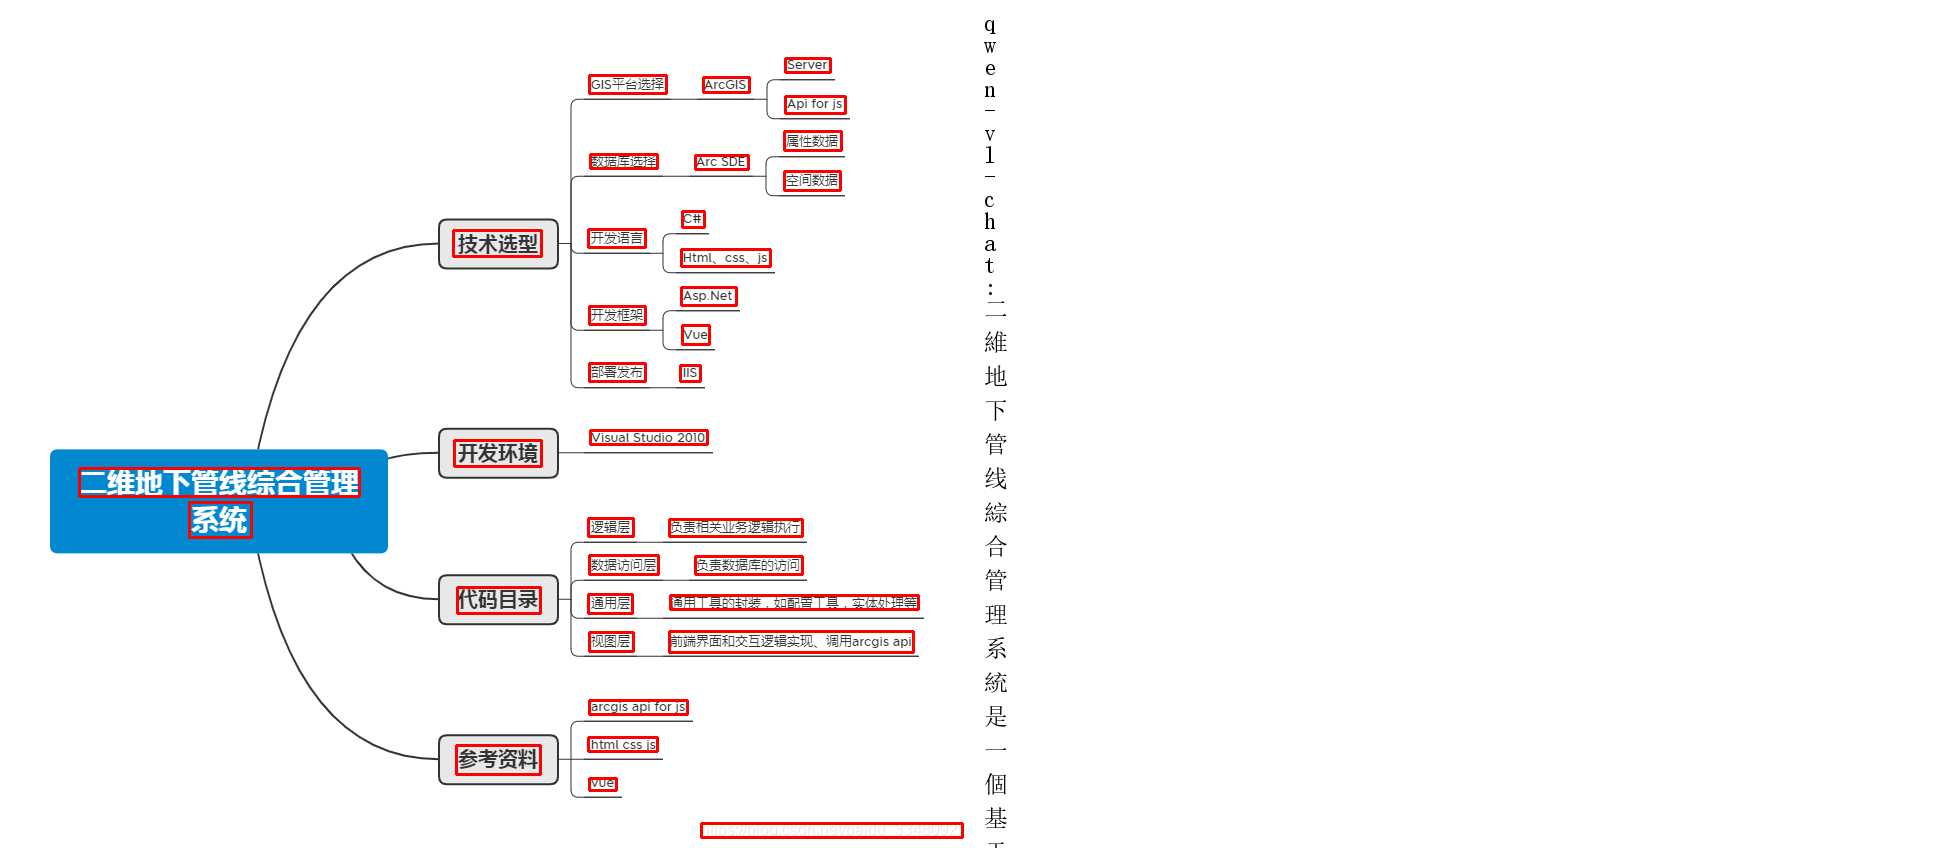

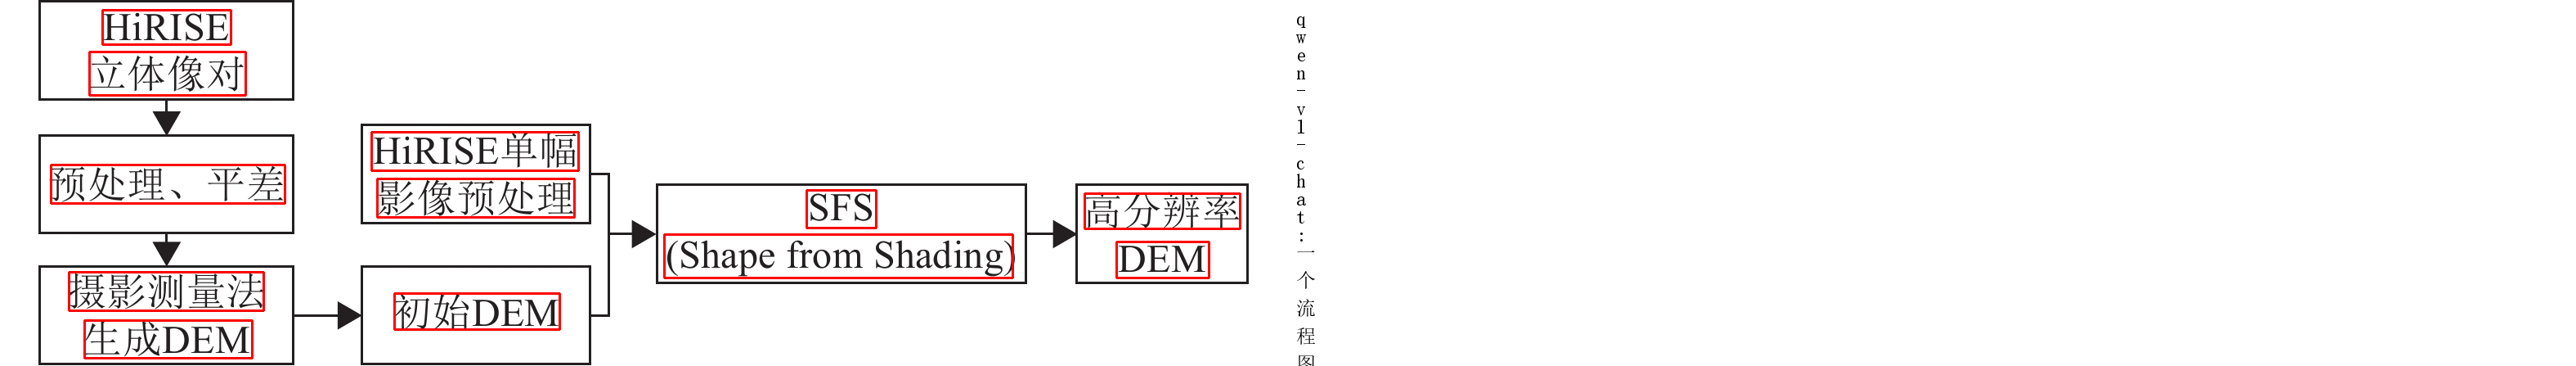

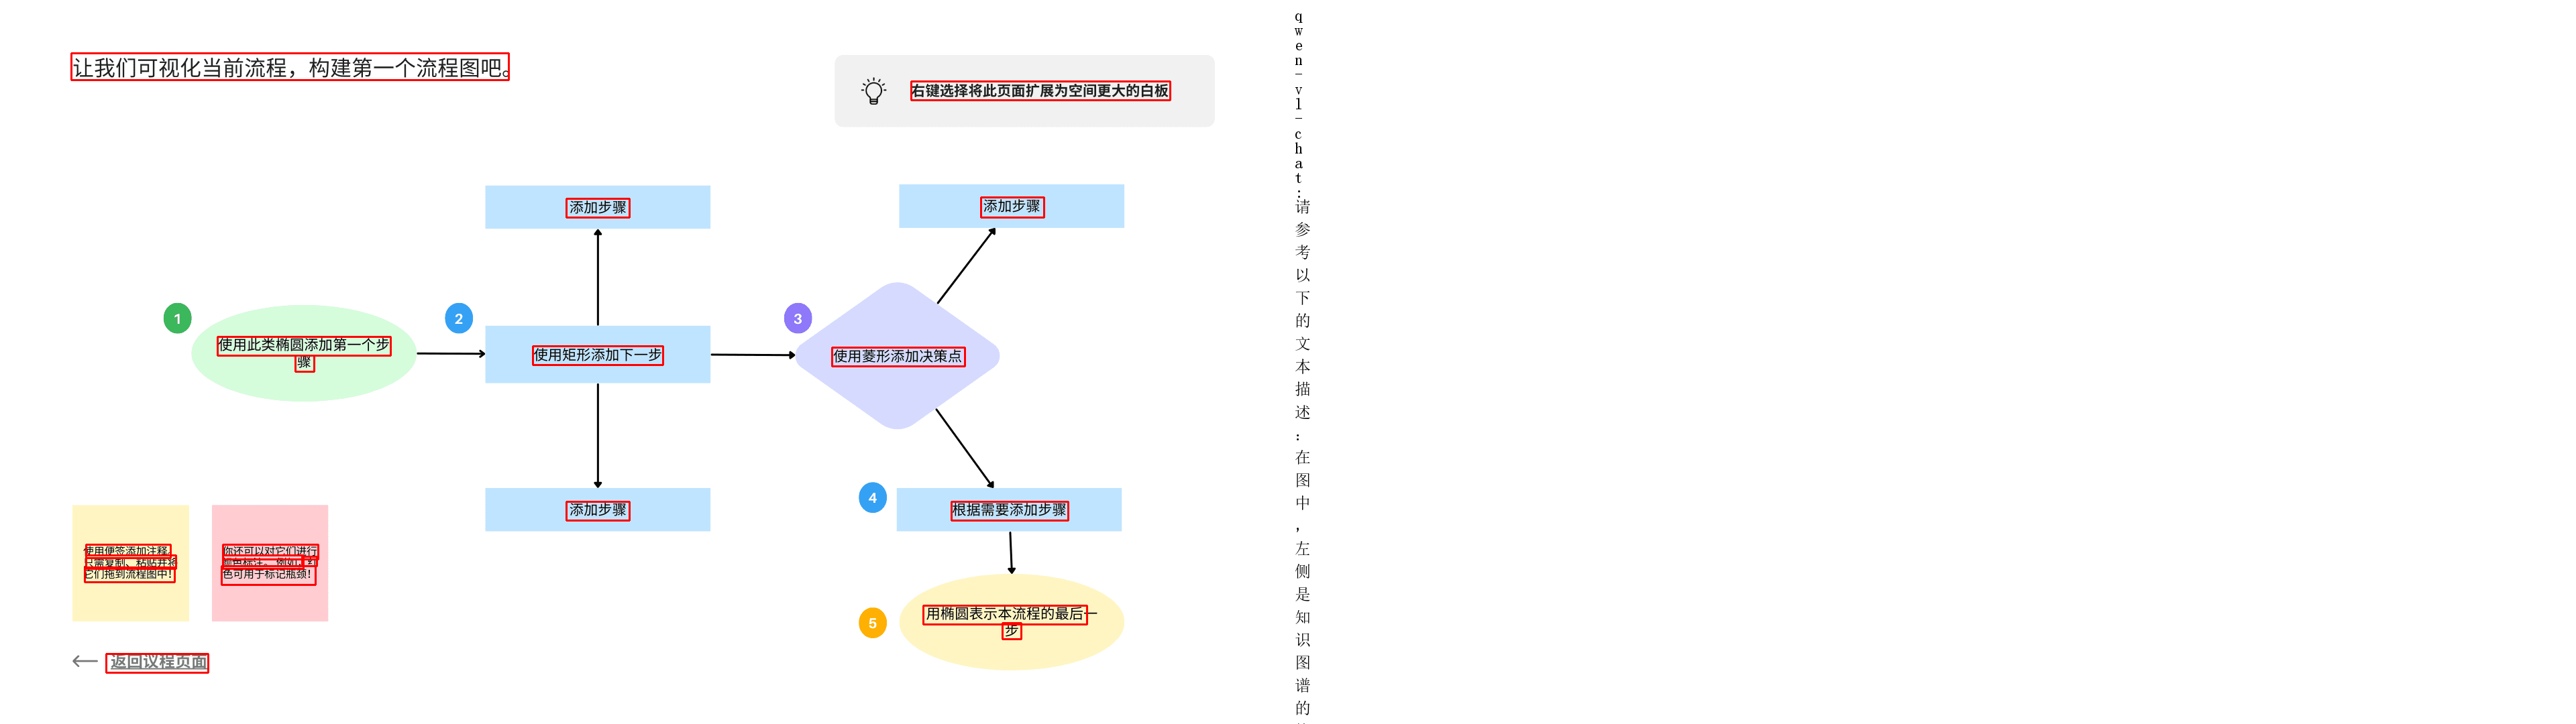

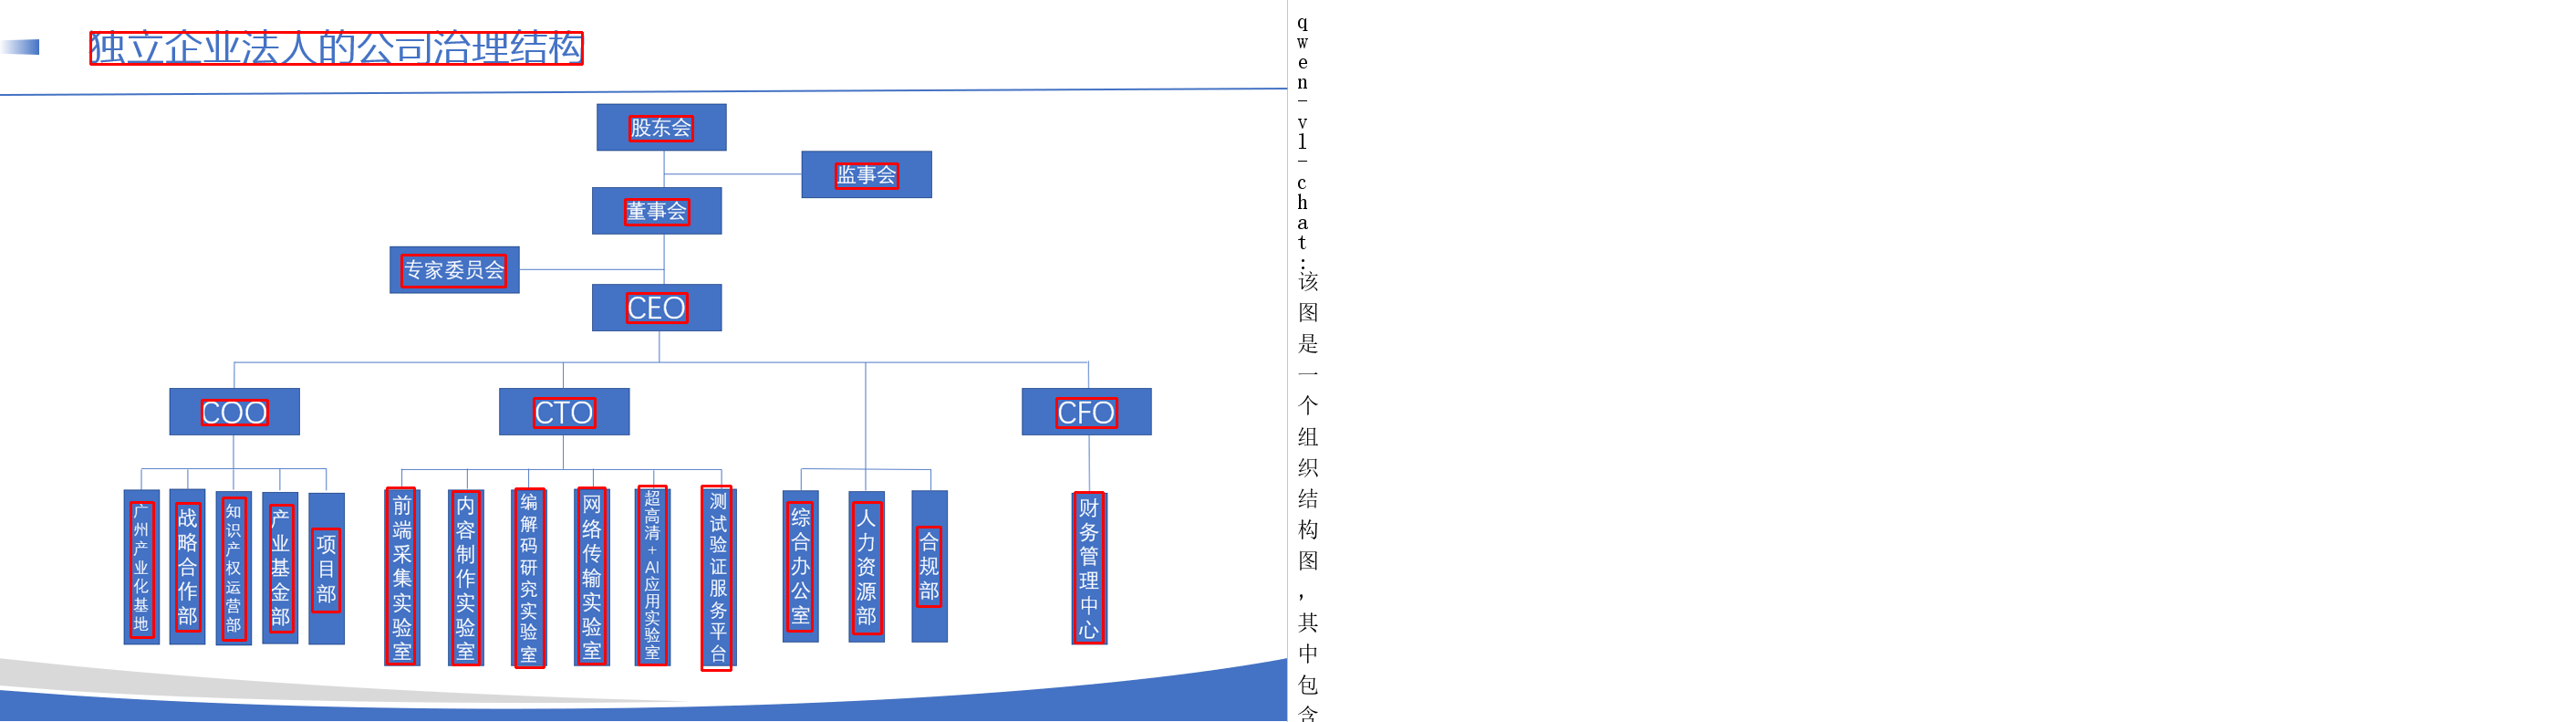

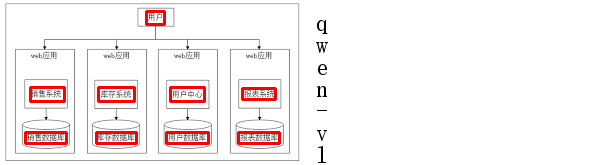

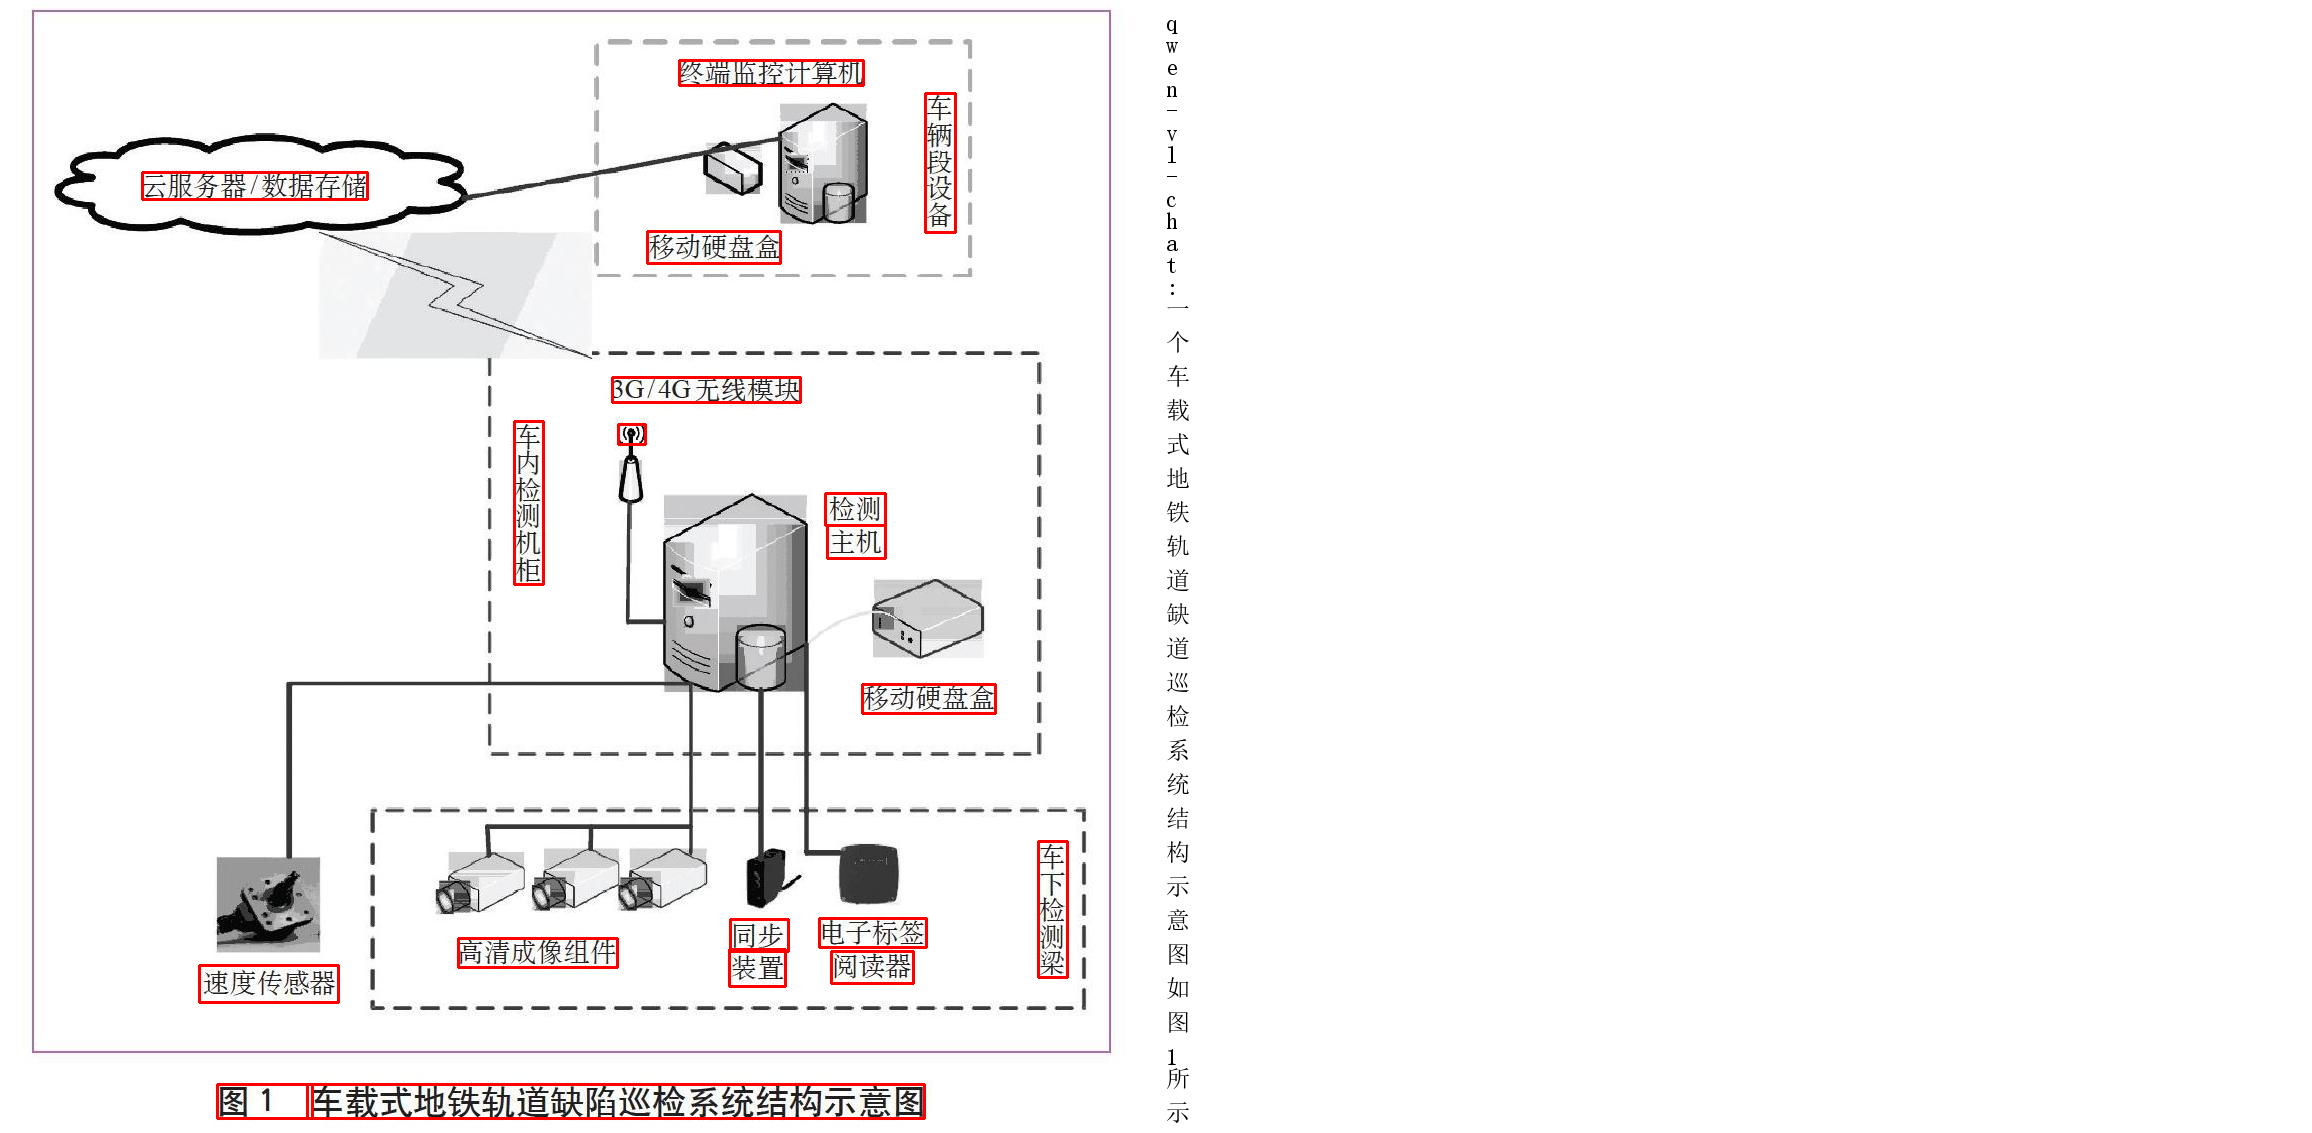

In [28]:
image_dir = "/home/rsr/gyl/HZBank/ocrres"
json_dir = "results/"
save_dir = "../visualization/"
json_names = os.listdir(json_dir)
info_results = dict()
# 收集图像信息
for json_name in json_names:
    json_path = os.path.join(json_dir, json_name)
    with open(json_path, 'r') as f:
        captions = json.load(f)
    for image_name, text_info in captions.items():
        if image_name not in info_results.keys():
            info_results[image_name] = []
        text = "{}:\n{}".format(json_name.split('.')[0], text_info["prediction"])
        info_results[image_name].append(text)

# 绘制图像
for image_name, captions in info_results.items():
    descriptions = '\n'.join(captions)
    create_visualization(os.path.join(image_dir, image_name), descriptions, os.path.join(save_dir, image_name))